<a href="https://colab.research.google.com/github/shreyashganvir77/Learn.MachineLearning.python/blob/main/Thopson's_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset.

In [17]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

Implementing the Thompson's Sampling.

In [18]:
# The thompson's sampling is similar to UCB modelling, rather than exploration and exploitation for selection of the upper confidence bound.
# Here we have probabilty distribution for each machine and then we pull the bandit's lever and plot each data on reward(x-axis). 
# Then the probabilty distribution is updated and then, this is continued till the rounds finished.

# The thompson's sampling is probabilistic and can accomodate delayed feedback's.
# Thompson's Sampling has better emperical evidences. 

import random
N = 500
d = 10
ads_selected = []
number_of_rewards_1 = [0]*d
number_of_rewards_0 = [0]*d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
    if (max_random < random_beta):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    number_of_rewards_1[ad] += 1
  else :
    number_of_rewards_0[ad] += 1  
  total_reward += reward

Visualizing the Result - Histogram.

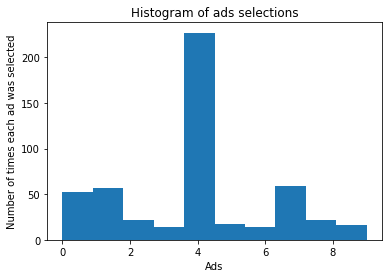

In [19]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()